In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Carregamento e exibição de parte da database "iris.csv

In [4]:
df.shape

(150, 5)

Quantidade de linhas e colunas da database

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Tipo dos dados da database

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Vemos que não existem dados nulos, então não precisamos tratar os dados.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


Descrição dos dados. Média, mediana, primeiro quartil, etc

In [6]:
df.species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

Aqui vemos que temos 3 espécies e que cada uma tem 50 linhas.

<AxesSubplot:>

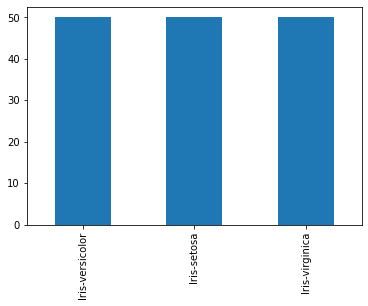

In [24]:
df.species.value_counts().plot(kind='bar')

Uma visualização gráfica da informação anterior.

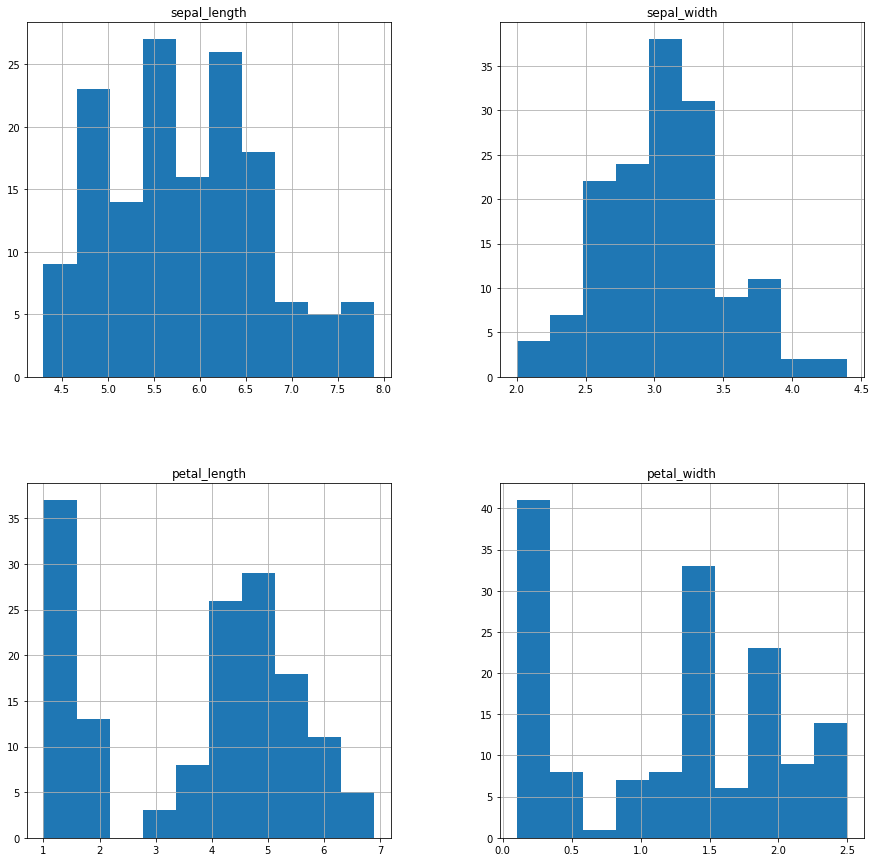

In [8]:
df.hist(figsize=(15,15))
plt.show()

Distribuição dos dados das pétalas e sépalas, tanto comprimento quanto largura.

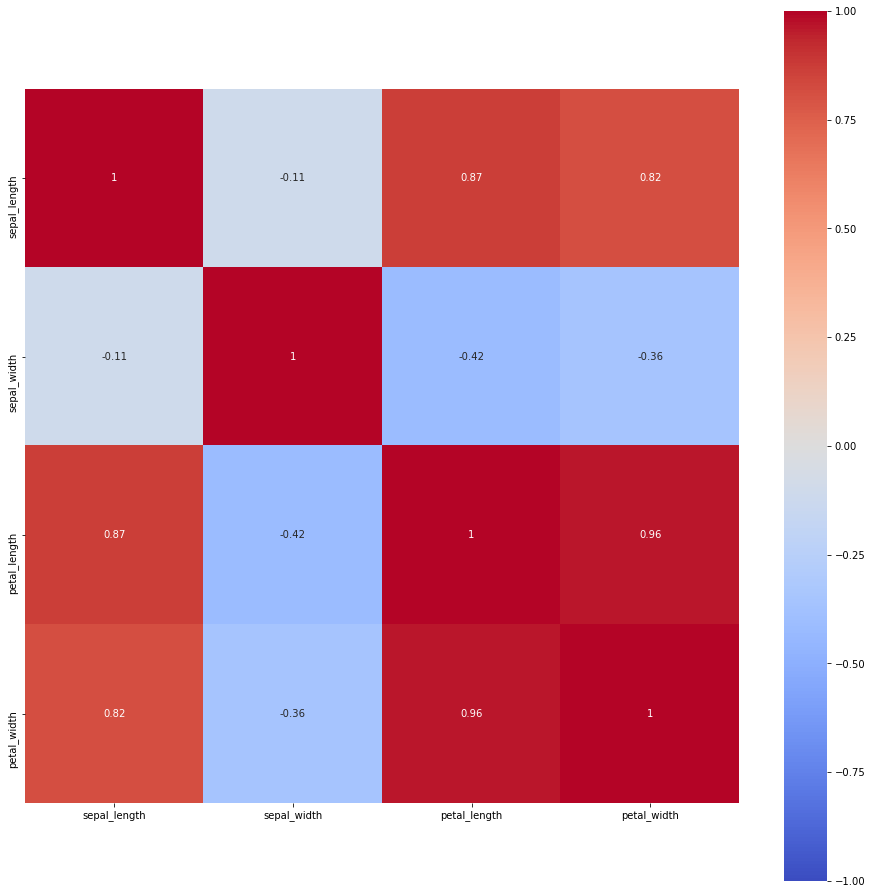

In [9]:
corr = df.corr()
fig = plt.figure(figsize = (16,16))
sns.heatmap(corr,vmax = 1,square = True,annot = True,cmap= 'coolwarm',vmin = -1)
plt.show()

Mapa de calor dos dados. Vemos que há uma correlação positiva e forte(0,96) entre o comprimento da pétala e a largura da pétala. Também há uma correlação forte, porém um pouco mais fraca (0,82) entre a largura da pétala e o comprimento da sépala.

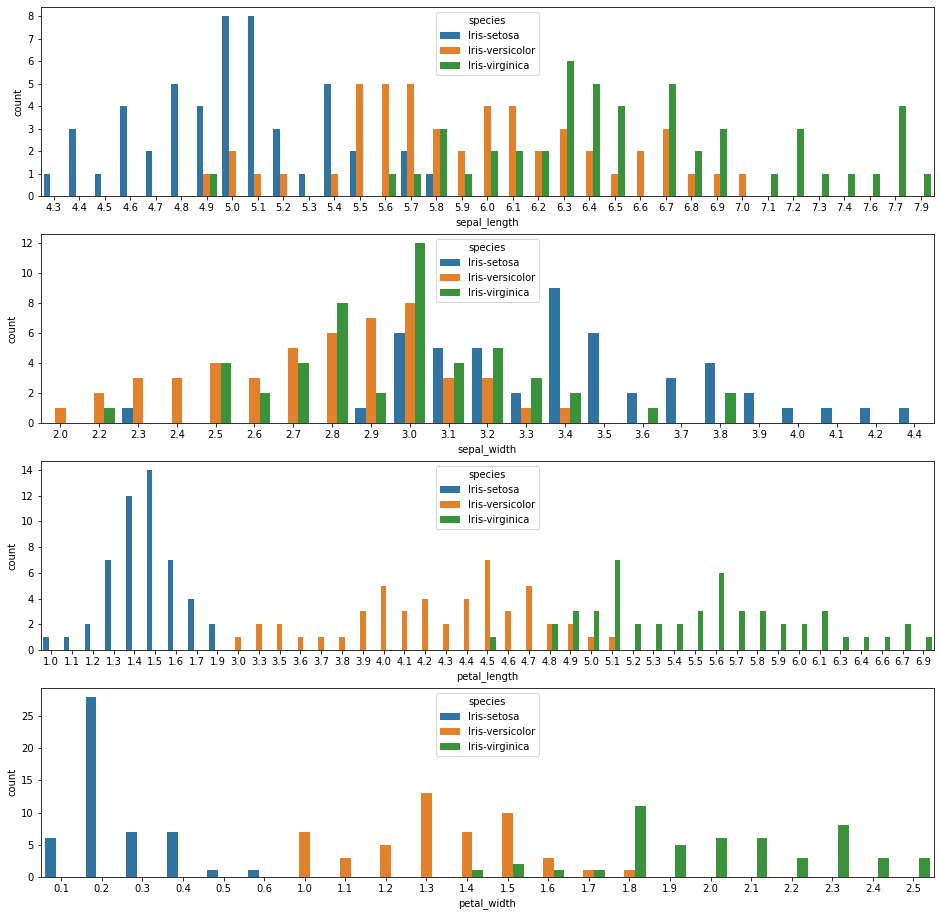

In [25]:
plt.figure(figsize = (16,16))

plt.subplot(4,1,1)
sns.countplot(x=df.sepal_length,hue=df.species)

plt.subplot(4,1,2)
sns.countplot(x=df.sepal_width,hue=df.species)

plt.subplot(4,1,3)
sns.countplot(x=df.petal_length,hue=df.species)

plt.subplot(4,1,4)
sns.countplot(x=df.petal_width,hue=df.species)

plt.show()

Aqui podemos ver que os dados das pétalas são bem distribuidos entre as espécies. Os menores tamanhos são referentes às setosas, os tamanhos "médios" dizem respeito ao versicolor e os maiores à virginica. Os dados das sépalas são mais dificeis de se ter uma análise mais certeira pois os dados se misturam mais.

<Figure size 1152x1152 with 0 Axes>

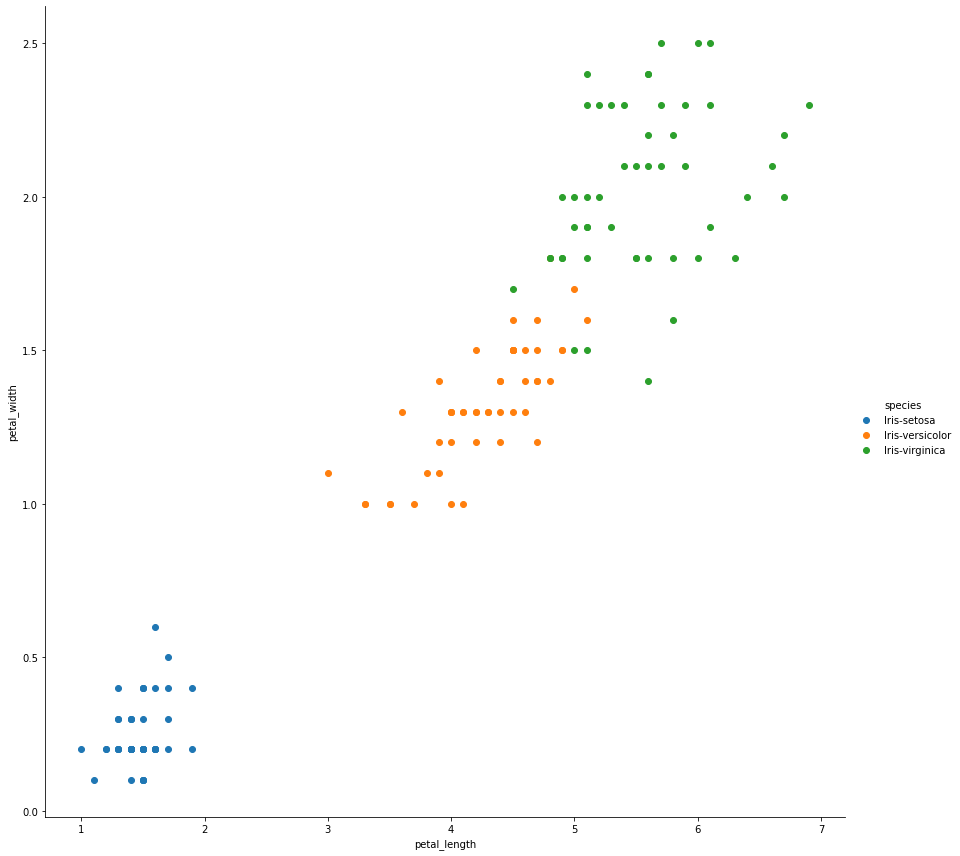

In [13]:
plt.figure(figsize = (16,16))
sns.FacetGrid(df,hue="species",height=12,legend_out=True).map(plt.scatter,"petal_length","petal_width").add_legend()
plt.show()


Nesse Scatter plot vemos, utilizando a largura da pétala como eixo X e a largura da pétala como eixo Y, a distribuição dos dados das plantas analisadas. Podemos ver que os dados da Setosa ficam bem concentrados no canto inferior esquerdo do gráfico, enquanto os dados da Virginica ficam majoritariamente no canto superior direito e o versicolor, mesmo que se fique perto dos dados da Virginica, ficam mais concentrados no centro do gráfico.

Com isso temos que :

1- As Setosas tem largura e comprimento das pétalas bem pequenos.

2- Os Versicolors tem largura e comprimento das pétalas de tamanho médios.

3- As Virginicas tem largura e comprimento das pétalas de tamanho maiores.

<Figure size 1152x1152 with 0 Axes>

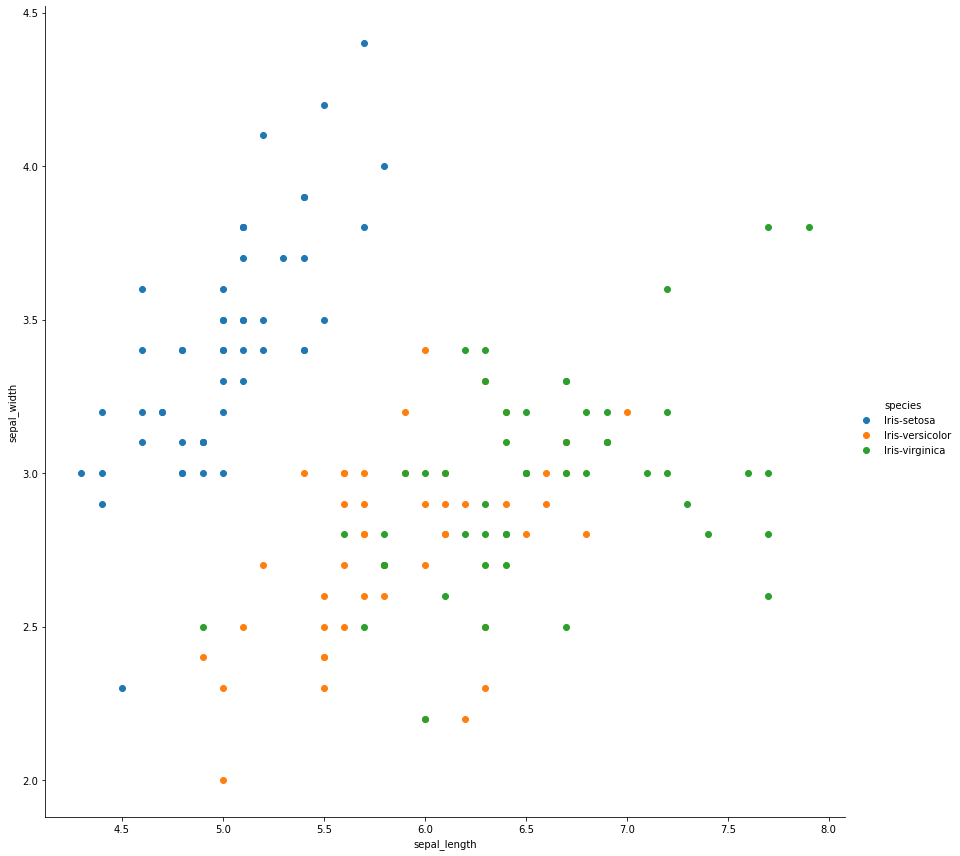

In [26]:
plt.figure(figsize = (16,16))
sns.FacetGrid(df,hue="species",height=12,legend_out=True).map(plt.scatter,"sepal_length","sepal_width").add_legend()
plt.show()


Nesse gráfico de dispersão fica bem claro que as Setosas têm um comprimento baixo de sépala, mas têm uma largura relativamente grande. Enquanto a versicolor e a virginica têm uma largura média, mas a versicolor tende a um comprimento menor, enquanto a virginica a um comprimento maior.

In [14]:
x=df.iloc[:,0:4].values
y=df.iloc[:,4].values

Passando os valores da coluna espécies como Y e os outros como X.

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=21)

Separando os dados como treino e teste.

In [16]:
maquina=KNeighborsClassifier(n_neighbors=3)
maquina = maquina.fit(x_train,y_train)
y_pred = maquina.predict(x_test)
print("precisão = ", metrics.accuracy_score(y_test, y_pred)*100)

precisão =  93.33333333333333


In [17]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[14  0  0]
 [ 0 15  1]
 [ 0  2 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      0.94      0.91        16
 Iris-virginica       0.93      0.87      0.90        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.94        45
   weighted avg       0.93      0.93      0.93        45



O Método Kneighbors utilizando o n_neighbors como 3 tem uma precisão de 93.3%

In [18]:
maquina2 = GaussianNB()
maquina2= maquina2.fit(x_train,y_train)
y_pred=maquina.predict(x_test)
print("precisão = ", metrics.accuracy_score(y_test, y_pred)*100)

precisão =  93.33333333333333


In [19]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[14  0  0]
 [ 0 15  1]
 [ 0  2 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      0.94      0.91        16
 Iris-virginica       0.93      0.87      0.90        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.94        45
   weighted avg       0.93      0.93      0.93        45



O Método naive bayes gaussiano tem uma precisão de 93.3% também.

In [20]:
arvore = tree.DecisionTreeClassifier()
arvore = arvore.fit(x_train,y_train)
y_pred=arvore.predict(x_test)
print("precisão = ", metrics.accuracy_score(y_test, y_pred)*100)

precisão =  93.33333333333333


In [21]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[14  0  0]
 [ 0 13  3]
 [ 0  0 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.81      0.90        16
 Iris-virginica       0.83      1.00      0.91        15

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.94      0.93      0.93        45



O método de árvore de decisão também teve 93.3 % de precisão, mas acertou todos os Setosa e Versicolor,errando apenas na Virginica.

In [22]:
random = RandomForestClassifier(n_estimators=27)
random = random.fit(x_train,y_train)
y_pred = random.predict(x_test)
print("precisão = ", metrics.accuracy_score(y_test, y_pred)*100)

precisão =  93.33333333333333


In [23]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[14  0  0]
 [ 0 13  3]
 [ 0  0 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.81      0.90        16
 Iris-virginica       0.83      1.00      0.91        15

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.94      0.93      0.93        45



O método Random Forest teve o mesmo exato resultado do método de árvore de decisão.